<a href="https://colab.research.google.com/github/zeelShah-12/-Heart-Disease/blob/main/Heart_Disease_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

# Load CSV file from the downloaded folder
df = pd.read_csv(path + "/heart.csv")  # <-- Make sure file name is correct

# View first 5 rows
print(df.head())

# Check basic info
print(df.info())

# Check missing values
print(df.isnull().sum())


Path to dataset files: /kaggle/input/heart-disease-dataset
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 

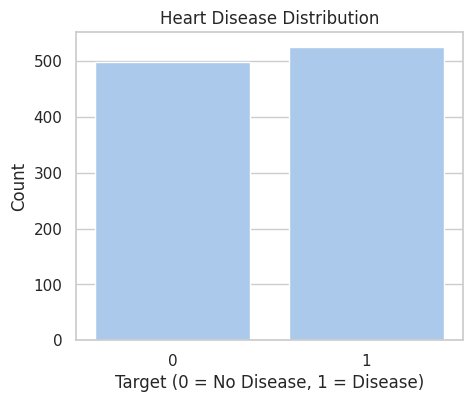

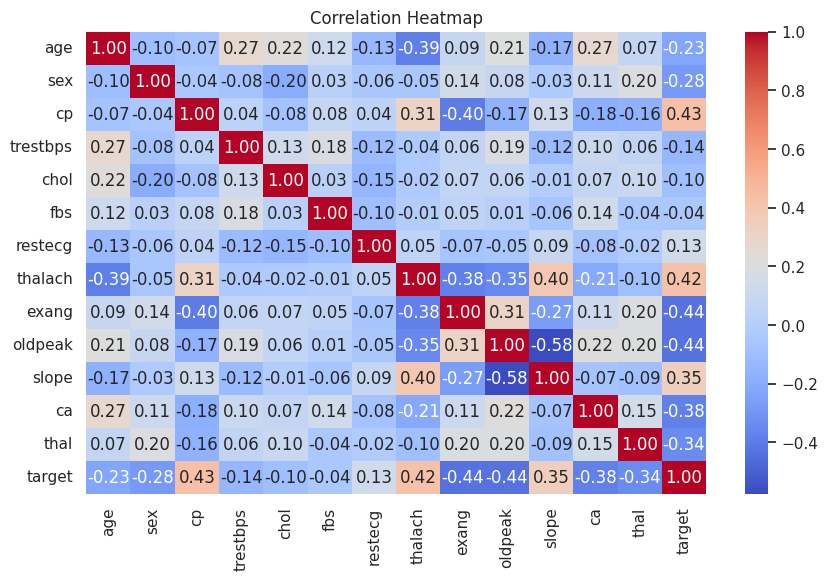

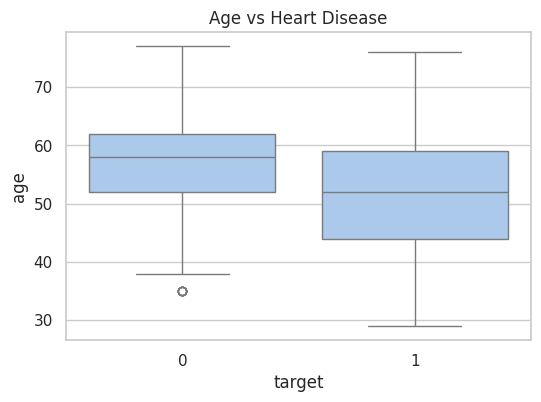

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for professional look
sns.set(style="whitegrid", palette="pastel")

# 1. Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

# 2. Correlation heatmap (only top correlations)
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 3. Age distribution by target
plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age vs Heart Disease')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# 2. Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Feature scaling (important for models like Logistic Regression, SVM, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shapes after preprocessing:")
print("X_train:", X_train_scaled.shape)
print("X_test:", X_test_scaled.shape)


Shapes after preprocessing:
X_train: (820, 13)
X_test: (205, 13)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define models to test
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC()
}

# Store results
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

# Convert results to DataFrame and sort by Accuracy
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
3        Random Forest  1.000000   1.000000  1.000000  1.000000
2        Decision Tree  0.985366   1.000000  0.971429  0.985507
4    Gradient Boosting  0.975610   0.971698  0.980952  0.976303
5                  SVM  0.926829   0.916667  0.942857  0.929577
1                  KNN  0.863415   0.873786  0.857143  0.865385
0  Logistic Regression  0.809756   0.761905  0.914286  0.831169


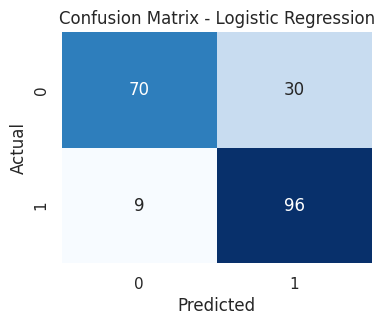

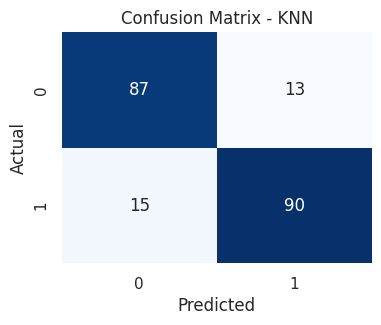

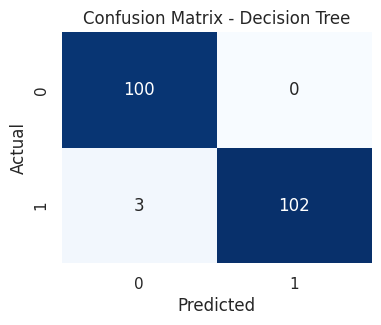

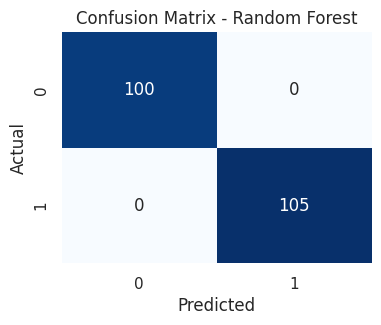

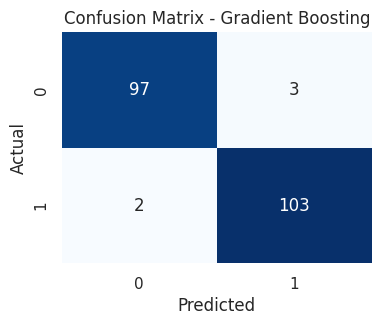

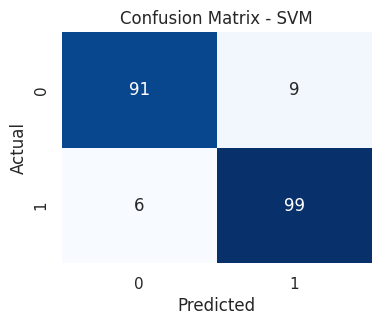

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [10]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit on training data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Test set performance with best model
best_rf = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test, best_rf.predict(X_test_scaled))
print("Test Accuracy with Best Random Forest:", test_accuracy)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9865853658536585
Test Accuracy with Best Random Forest: 1.0


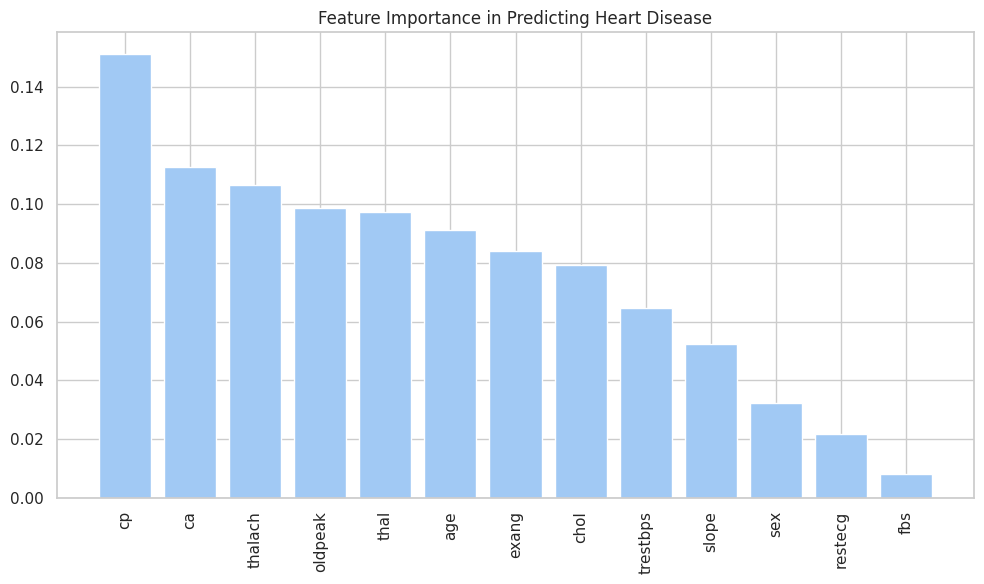

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the best model
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Predicting Heart Disease")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


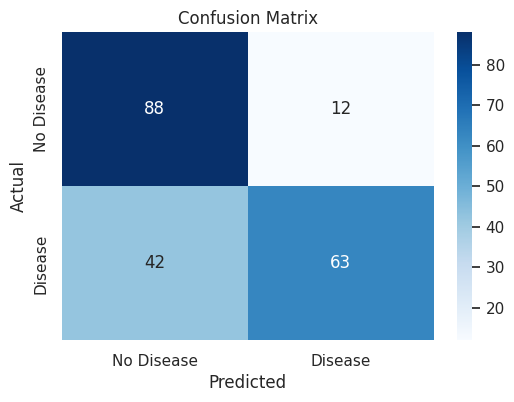

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.88      0.77       100
           1       0.84      0.60      0.70       105

    accuracy                           0.74       205
   macro avg       0.76      0.74      0.73       205
weighted avg       0.76      0.74      0.73       205

Accuracy Score: 0.7365853658536585


In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = best_rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))


In [13]:
import joblib

# Save the trained model
joblib.dump(best_rf, "heart_disease_model.pkl")

# Save the scaler (since you need it when predicting new data)
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [14]:
import joblib
import numpy as np

# Load saved model and scaler
model = joblib.load("heart_disease_model.pkl")
scaler = joblib.load("scaler.pkl")

# Example: New patient data
# Format: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
new_patient = np.array([[52, 1, 0, 125, 212, 0, 1, 168, 0, 1.0, 2, 2, 3]])

# Scale the input
new_patient_scaled = scaler.transform(new_patient)

# Predict
prediction = model.predict(new_patient_scaled)
prediction_proba = model.predict_proba(new_patient_scaled)

# Output result
if prediction[0] == 1:
    print("⚠️ Patient is likely to have heart disease")
else:
    print("✅ Patient is unlikely to have heart disease")

print("Prediction probabilities:", prediction_proba)


✅ Patient is unlikely to have heart disease
Prediction probabilities: [[0.99333333 0.00666667]]
